# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
plt.style.use('ggplot')

In [3]:
# Читаем данные

X_train = pd.read_csv('train_features_with_answers.csv')

In [4]:
# Про характеристики прочитайте в источнике

X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ. 

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки. 

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

### Константы:

In [5]:
FIG_SQUARE = 7
FIG_HIGHT = 7
FIG_WIDTH = 14

FONTSIZE_TITLE = 20
FONTSIZE_LABEL = 13

EXPLODE = 0.05

TICKS_GAP = 2

THIRD_COLUMN = 'nursery'

COLORS = ['tomato', 'royalblue', 'slateblue', 'moccasin']
COLUMNS_NUMERIC = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                   'failures', 'famrel', 'freetime', 'goout', 'Dalc',
                   'Walc', 'health', 'absences', 'G3']
COLUMNS_NOTNUM = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                  'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                  'famsup', 'paid', 'activities', 'nursery', 'higher',
                  'internet', 'romantic']

### Несколько вспомогательных функций:

In [6]:
def create_counted_values_table(df, column):
    
    counted_values_series = df[column].value_counts()
    
    data = {column: list(counted_values_series.index), 
            'amount':list(counted_values_series.values)}
    
    return pd.DataFrame(data)

In [7]:
def create_pie(df, column, ax):
         
    df_for_pie = pd.DataFrame(df[column].value_counts())
        
    explode = np.ones(df_for_pie.shape[0]) * EXPLODE
    
    df_for_pie.plot(kind='pie', ax=ax, explode=explode, subplots=True,
                    shadow=True, labels=None, legend=None)
    
    ax.set_aspect(1)
    
    ax.set_title(f'Pie: {column}', fontsize=FONTSIZE_TITLE, fontweight='bold')
    ax.set_ylabel('')
    
    ax.legend(labels=df_for_pie.index)

In [8]:
def create_hist(df, column, ax):
    
    series_for_hist = df[column]
    
    series_for_hist.hist(ax=ax, grid=True, color='tomato')
    
    ax.set_xlabel(column, fontsize=FONTSIZE_LABEL, fontweight='bold')
    ax.set_ylabel('amount', fontsize=FONTSIZE_LABEL, fontweight='bold')
    
    ax.set_title(f'Hist: {column}', fontsize=FONTSIZE_TITLE, fontweight='bold')

In [9]:
def create_boxplot(df, column, ax):
    
    df.boxplot(column=column, vert=False, ax=ax)

In [10]:
def create_violinplot(df, column, ax):
    
    sns.violinplot(data=df[column], orient='h', color=COLORS[1], ax=ax)
    
    ax.set_ylabel(column, fontsize=FONTSIZE_LABEL, fontweight='bold')

In [11]:
def visualize_diagrams(df, column):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HIGHT))

    create_pie(df, column, ax1)
    create_hist(df, column, ax2)

    plt.show()

In [12]:
def visualize_table(df, columns, visualizer, amount_row=1, amount_column=1,
                    fig_hight=FIG_SQUARE, fig_width=FIG_SQUARE):
    
    if amount_row * amount_column != len(columns):
        raise RuntimeError('impossible to locate all graphs in this grid;')
        
    fig, axes = plt.subplots(amount_row, amount_column, 
                             figsize=(amount_column * fig_width, amount_row * fig_hight))
    
    if type(axes) != np.ndarray:
        visualizer(df, columns[0], axes)
        
    else:
        
        axes = axes.ravel()
        
        for i, column in enumerate(columns):
            visualizer(df, column, axes[i])
            
    plt.show()

In [13]:
def visualize_hists_3D(df, groups, categories):
    
    df = df[[groups, categories, THIRD_COLUMN]].groupby(by=[groups, categories]).count()
    
    multi_indicies = np.array(list(map(np.array, df.index)))
    
    ticks_categories = np.array(multi_indicies[:, 1], dtype=type(df.index[0][1]))
    ticks_categories = np.unique(ticks_categories)
    
    ticks_groups = np.array(multi_indicies[:, 0], dtype=type(df.index[0][0]))
    ticks_groups = np.unique(ticks_groups)

    x = np.arange(ticks_categories.size)
    y = np.arange(0, TICKS_GAP * ticks_groups.size, TICKS_GAP)
    X, Y = np.meshgrid(x, y)
    xx, yy = X.ravel(), Y.ravel()

    tops, bottoms = np.zeros_like(xx), np.zeros_like(xx)
    width, depth = 0.2, 1

    index_curr, row = df.index[0][0], 0
    
    for multi_index in df.index:

        if multi_index[0] != index_curr:
            index_curr = multi_index[0]
            row += 1

        column = np.where(ticks_categories == multi_index[1])[0][0]
        index_top = int(ticks_categories.size * row + column)

        tops[index_top] = df.loc[multi_index][0]
        
    colors = []
    
    for i in range(ticks_categories.size):
        colors.append(COLORS[i % len(COLORS)])
        
    colors = colors * (xx.size // ticks_categories.size)
    
    fig = plt.figure(figsize=(FIG_WIDTH, FIG_WIDTH))

    ax = fig.add_subplot(111, projection='3d')

    ax.set_title(f'3D: {categories}', fontsize=FONTSIZE_TITLE, fontweight='bold')

    ax.set_xlabel(categories, fontsize=FONTSIZE_LABEL, 
                  fontweight='bold')
    ax.set_ylabel(groups, fontsize=FONTSIZE_LABEL, 
                  fontweight='bold', rotation=45)

    ax.bar3d(xx, yy, bottoms, width, depth, tops, shade=True, color=colors)

    ax.set_xticks(x)
    ax.set_yticks(y)

    ax.set_xticklabels(ticks_categories)
    ax.set_yticklabels(ticks_groups)

    plt.show()

## Характеристика: "Sex"

Согласно информации о таблице, `Sex` - бинарный признак, поэтому данные о нём было бы удобно представить таблицей с двумя стобцами: полом и числом людей, относящихся к данному полу. Также подходящей визуализацией для данного признака были бы круговая диаграмма и гистограмма.

**Таблица:**

In [14]:
create_counted_values_table(X_train, 'sex')

,sex,amount
0,F,257
1,M,189
2,D,5
3,C,1
4,B,1
5,A,1


**Незаполненные строки:**

In [15]:
X_train[['sex']].isna().sum()

sex    0
dtype: int64

**Визуализация:**

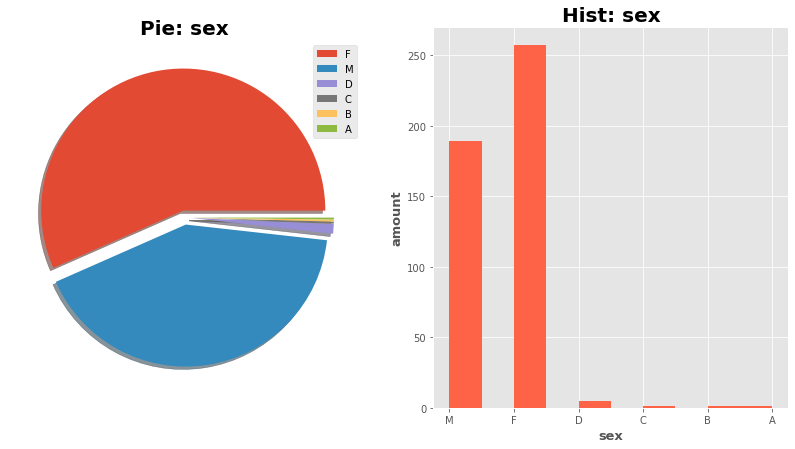

In [16]:
visualize_diagrams(X_train, 'sex')

**Выводы:** 
- ~~мы видим гендерное разнообразие~~ как можно видеть из таблицы и диаграмм, помимо заявленных допустимых значений, в датасете присутствуют недопустимые, ввиду бинарности признака, значения;   
- в данном столбце отсутствуют пропуски (NaN'ы);    
- среди участников, чьи данные содержаться в таблице, больше девушек;

## Характеристика: "Age"

**Таблица:**

In [17]:
create_counted_values_table(X_train, 'age')

,age,amount
0,17.0,111
1,16.0,111
2,18.0,95
3,15.0,73
4,19.0,19
5,20.0,6
6,21.0,2
7,161.0,1
8,181.0,1
9,151.0,1


**Незаполненные строки:**

In [18]:
X_train[['age']].isna().sum()

age    28
dtype: int64

**Визуализация:**

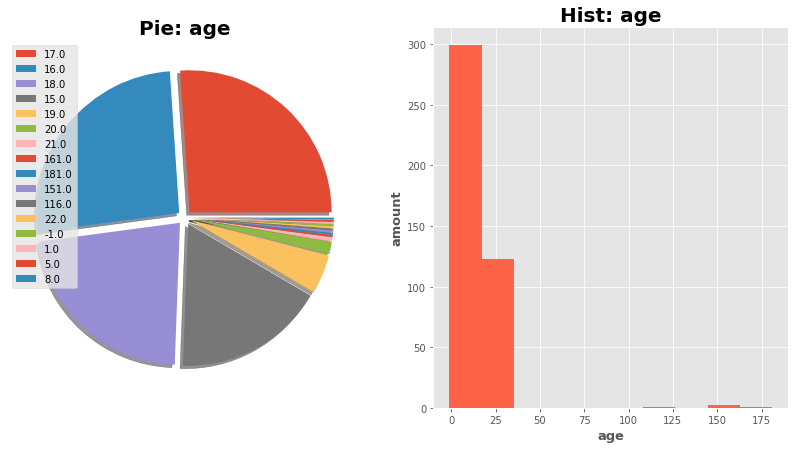

In [19]:
visualize_diagrams(X_train, 'age')

**Выводы:** 
- мы снова столкнулись с наличием некорректно заполненных полей, поскольку допустимыми значениями являются числа от 15 до 22;    
- в данном столбце присутствует 28 пропусков;
- подавляющее большинство учеников, чьи данные содержаться в таблице, несовершеннолетние;

**Небольшая проверка**

В связи с тем, что в таблице присутствуют некорректно заполненные поля пола и возраста, я задался вопросом, не одни ли и те же ученики заполнили поля некорректно. Далее идёт ячейка кода, дающая ответ на этот вопрос:

In [20]:
X_train[((X_train['sex'] != 'F') & (X_train['sex'] != 'M')) & 
        ((X_train['age'] < 15) | (X_train['age'] > 22))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3


**Вывод:** множество людей, допустивших ошибку в поле `Sex`, не пересекается со множеством людей, допустивших ошибку в поле `Age`.

## Характеристика: "Weekly study time"

**Таблица:**

In [21]:
create_counted_values_table(X_train, 'studytime')

,studytime,amount
0,2,213
1,1,156
2,3,64
3,4,21


**Незаполненные строки:**

In [22]:
X_train[['studytime']].isna().sum()

studytime    0
dtype: int64

**Визуализация:**

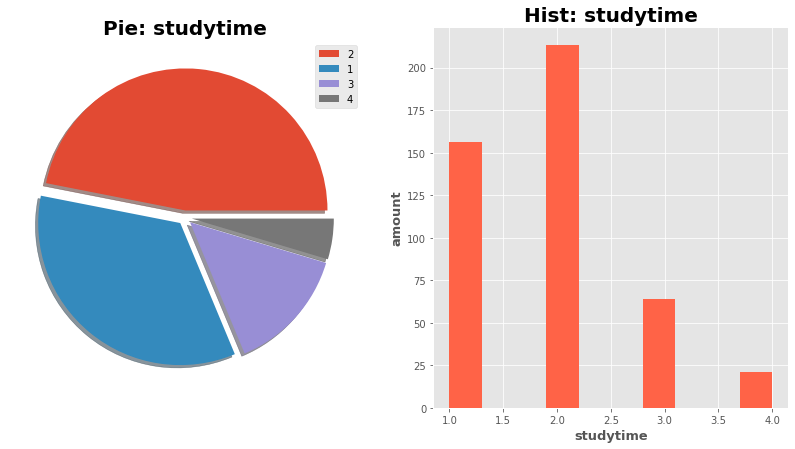

In [23]:
visualize_diagrams(X_train, 'studytime')

**3D-визуализация:**

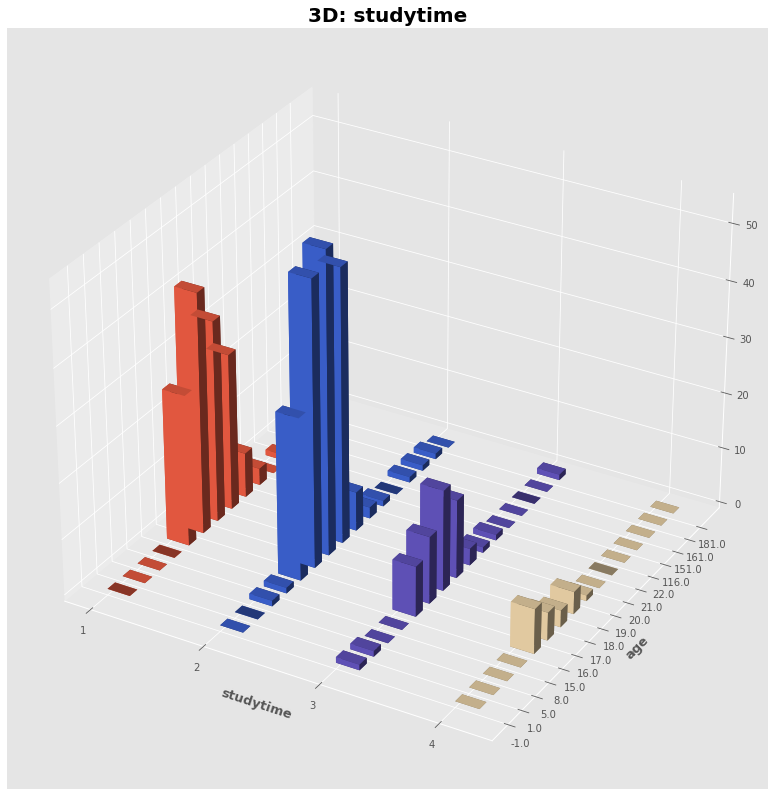

In [24]:
visualize_hists_3D(X_train, 'age', 'studytime')

**Выводы:** 
- поскольку допустимые значения для данного признака - числа от 1 до 4, видно, что в данном столбце отсутствуют ошибки;   
- в данном столбце отсутствуют пропуски;    
- большая часть учеников, принявших участие в опросе, тратят на учёбу от 2 до 5 часов в неделю;

## Характеристика: "Romantic Relationship"

**Таблица:**

In [25]:
create_counted_values_table(X_train, 'romantic')

,romantic,amount
0,no,289
1,yes,165


**Незаполненные строки:**

In [26]:
X_train[['romantic']].isna().sum()

romantic    0
dtype: int64

**Визуализация:**

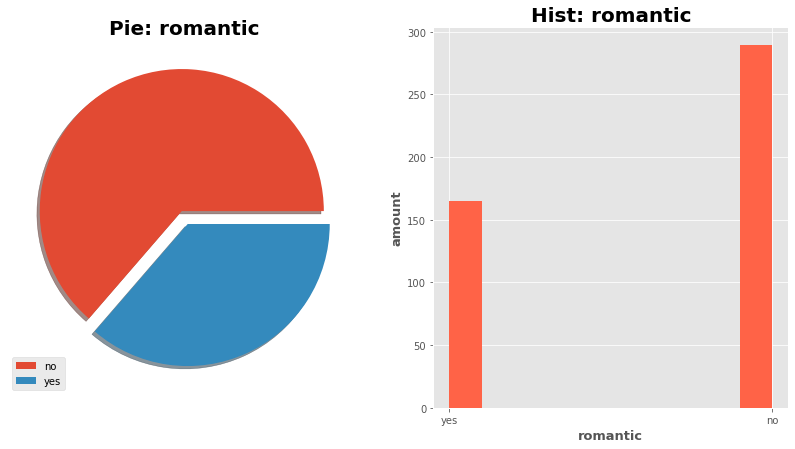

In [27]:
visualize_diagrams(X_train, 'romantic')

**Выводы:** 
- это поле также корректно заполнено;  
- пропуски отсутствуют;   
- лишь треть учеников, чьи данные содержаться в таблице, состоят в отношениях;

## Характеристика: "Alcohol Consumption"

Поскольку в таблице содержиться сразу две колонки с данными об употреблении алкоголя, а в задании не конкретизированно, какая именно колонка нас интересует, я проанализировал обе.

### 1. Характеристика: "Dalc"

**Таблица:**

In [28]:
create_counted_values_table(X_train, 'Dalc')

,Dalc,amount
0,1,318
1,2,76
2,3,33
3,4,14
4,5,13


**Незаполненные строки:**

In [29]:
X_train[['Dalc']].isna().sum()

Dalc    0
dtype: int64

**Визуализация:**

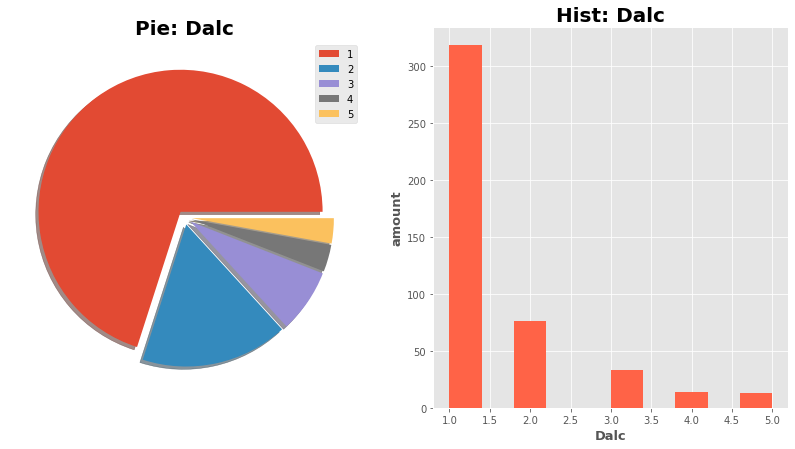

In [30]:
visualize_diagrams(X_train, 'Dalc')

**3D-визуализация:**

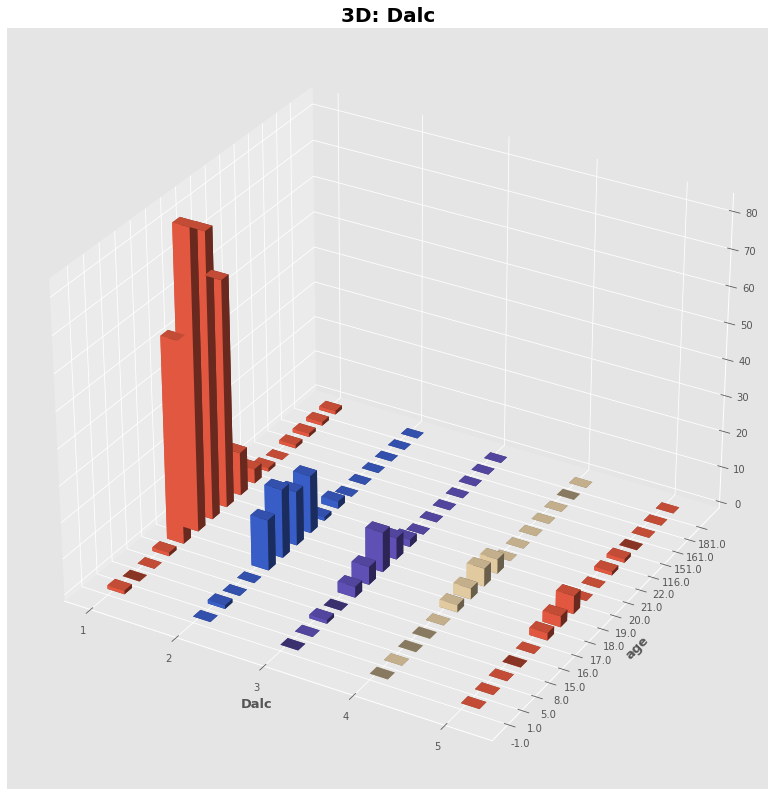

In [31]:
visualize_hists_3D(X_train, 'age', 'Dalc')

**Выводы:**
- данные заполненые без ошибок;    
- пропуски в данных отсутствуют;    
- примерное 75% учащихся, чьи данные содержаться в таблице, почти не употребляют алкоголь на ежедневной основе;    
- среди учеников, ежедневно употребляющих большое количество алкоголя, наибольшие показатели наблюдаются в группе 18-летних;

### 2. Характеристика: "Walc"

**Таблица:**

In [32]:
create_counted_values_table(X_train, 'Walc')

,Walc,amount
0,1,175
1,2,98
2,3,85
3,4,60
4,5,36


**Незаполненные строки:**

In [33]:
X_train[['Walc']].isna().sum()

Walc    0
dtype: int64

**Визуализация:**

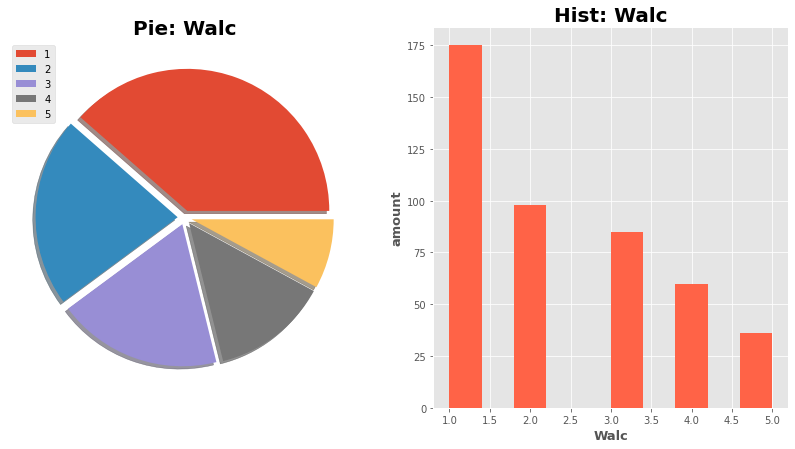

In [34]:
visualize_diagrams(X_train, 'Walc')

**3D-визуализация:**

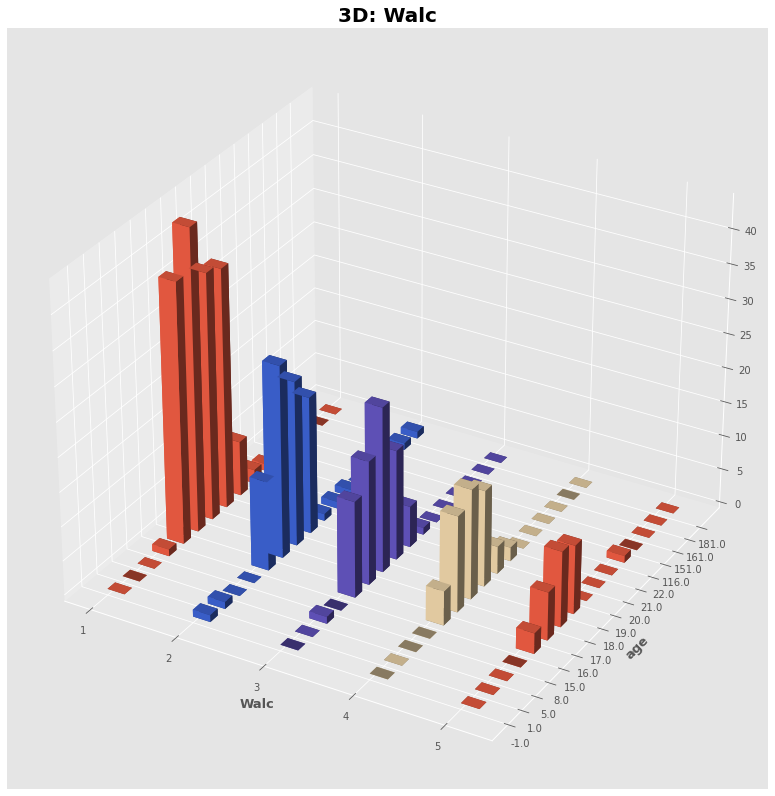

In [35]:
visualize_hists_3D(X_train, 'age', 'Walc')

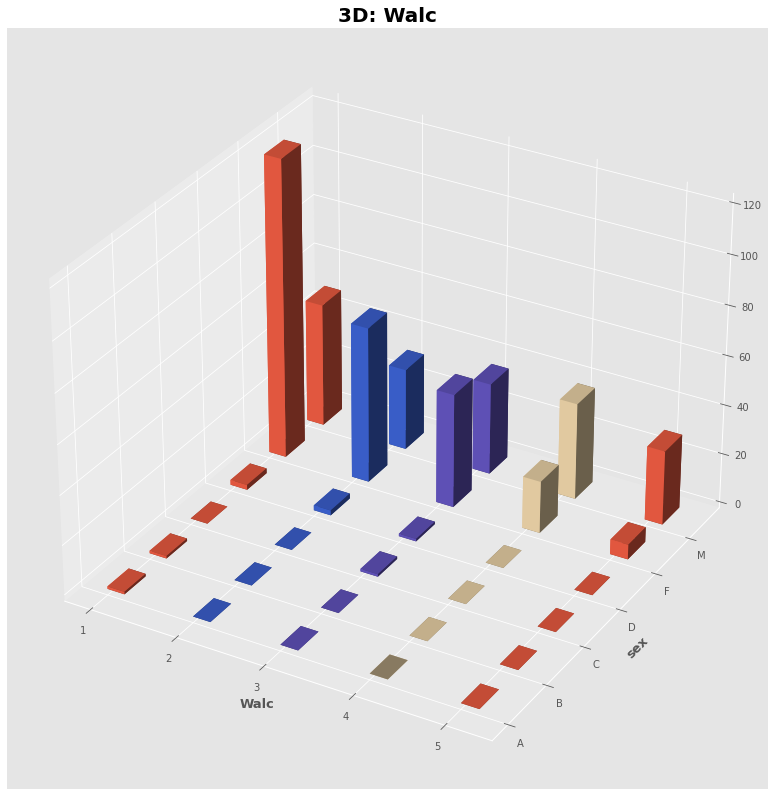

In [36]:
visualize_hists_3D(X_train, 'sex', 'Walc')

**Выводы:**
- данные заполненые без ошибок;    
- пропуски в данных отсутствуют;    
- примерное треть учащихся, чьи данные содержаться в таблице, почти не употребляют алкоголь на еженедельной основе;    
- среди учеников, еженедельно употребляющих большое количество алкоголя, наибольшие показатели наблюдаются в группе 17-летних;
- доля мужчин, употребляющих большое количество алкоголя еженедельно, выше, чем доля женщин;

## Целевая зависимость: "G3" (Final Grade)

**Таблица:**

In [37]:
create_counted_values_table(X_train, 'G3')

,G3,amount
0,10,70
1,11,69
2,13,60
3,12,47
4,14,47
5,15,36
6,9,26
7,8,26
8,16,23
9,17,21


**Незаполненные строки:**

In [38]:
X_train[['G3']].isna().sum()

G3    0
dtype: int64

**Визуализация:**

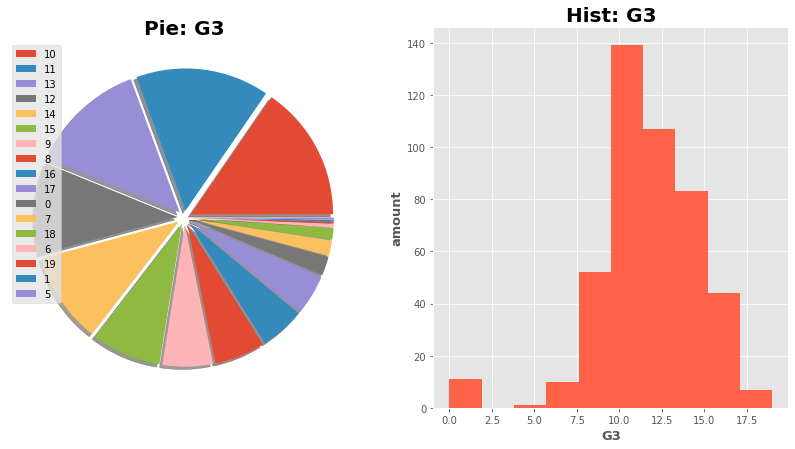

In [39]:
visualize_diagrams(X_train, 'G3')

**Выводы:**
- данные заполнены корректно;
- пропуски отсутствуют;
- наибольшая группа - люди, имеющие итоговую оценку 10;   
- люди, имеющие максимальную оценку 20, отсутствуют;

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

**Pieplot:**

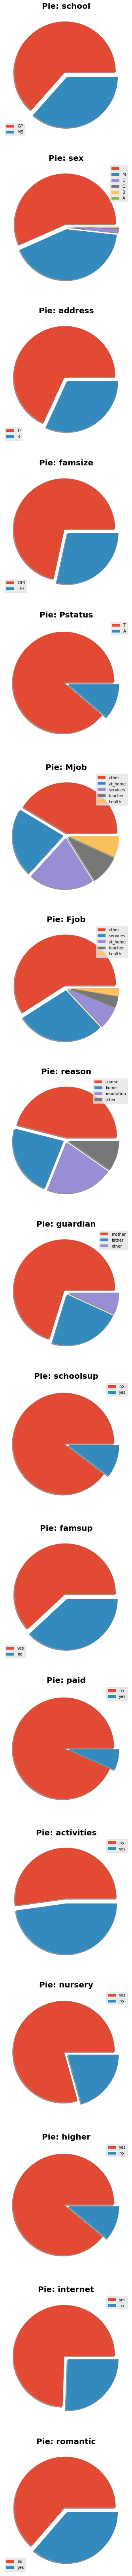

In [40]:
visualize_table(X_train, COLUMNS_NOTNUM, create_pie,
                amount_row=17)

**Выводы:**
- среди нечисловых признаков недопустимые значения присутствуют только в колонке `Sex`;

**Boxplot:**

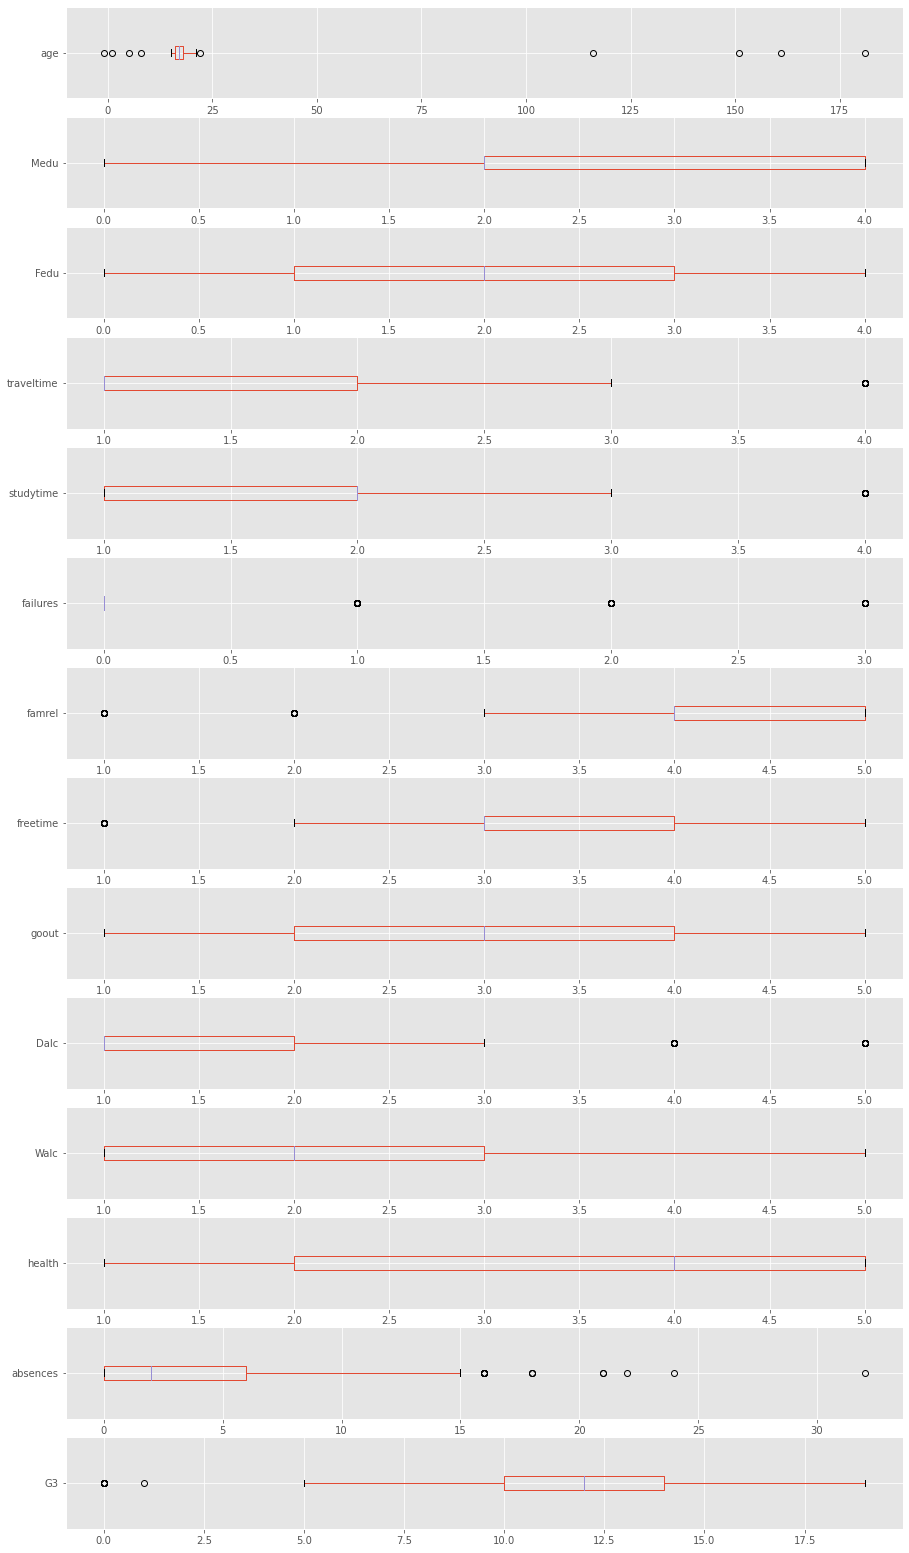

In [41]:
visualize_table(X_train, COLUMNS_NUMERIC, create_boxplot, 
                amount_row=14, fig_hight=2, fig_width=15)

**Violinplot:**

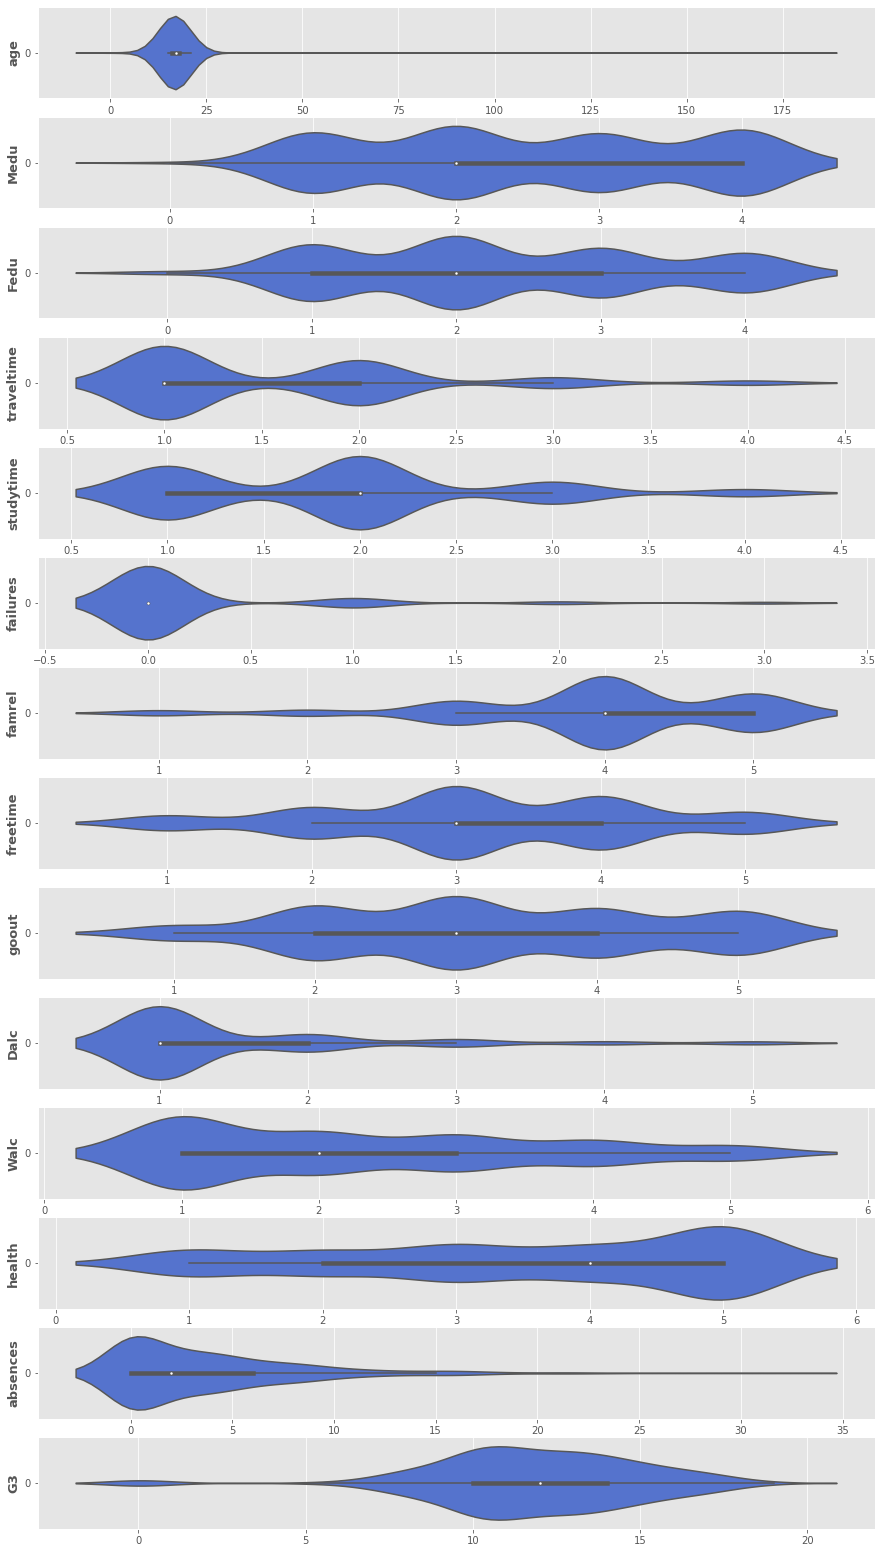

In [42]:
visualize_table(X_train, COLUMNS_NUMERIC, create_violinplot, 
                amount_row=14, fig_hight=2, fig_width=15)

**Выводы:**
- большое количество выбросов присутствует в колонке `age`, причём выбросам соответствуют недопустимые для данного признака значения, от них придётся избавляться;    
- присутствует выброс в столбцах `traveltime`, `studytime`, `failures`, `famrel`, `freetime`, `Dalc`, `absences`, `G3`, , однако их значения лежит в пределах допустимых значений признаков, следовательно, это может указывать на наличие какой-то сложной зависимости;

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

In [43]:
corr_pearson = X_train.corr()
corr_pearson

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,0.017118,0.015926,-0.045215,0.037509,-0.000269,0.050729,-0.048159,-0.019423,-0.033190,-0.038725,-0.105574,-0.026602,-0.031453
Medu,0.017118,1.000000,0.650052,-0.292153,0.088940,-0.172137,0.068827,0.029327,0.055263,-0.011133,-0.021110,0.045795,0.018881,0.207645
Fedu,0.015926,0.650052,1.000000,-0.211014,0.077986,-0.157411,0.086715,0.032968,0.062423,-0.002507,-0.001616,0.086325,0.047975,0.196666
traveltime,-0.045215,-0.292153,-0.211014,1.000000,-0.084222,0.079322,-0.025235,0.003360,0.008395,0.078637,0.048305,-0.047959,-0.041817,-0.150548
studytime,0.037509,0.088940,0.077986,-0.084222,1.000000,-0.125199,-0.024362,-0.075368,-0.098676,-0.152659,-0.243818,-0.052498,-0.099545,0.217938
failures,-0.000269,-0.172137,-0.157411,0.079322,-0.125199,1.000000,-0.064462,0.112960,0.052652,0.153152,0.135870,0.045039,0.121685,-0.407549
famrel,0.050729,0.068827,0.086715,-0.025235,-0.024362,-0.064462,1.000000,0.113157,0.070991,-0.052349,-0.075185,0.111193,-0.117433,0.087383
freetime,-0.048159,0.029327,0.032968,0.003360,-0.075368,0.112960,0.113157,1.000000,0.359857,0.110431,0.166500,0.109172,-0.000584,-0.093619
goout,-0.019423,0.055263,0.062423,0.008395,-0.098676,0.052652,0.070991,0.359857,1.000000,0.241739,0.421281,-0.008693,0.059189,-0.090558
Dalc,-0.033190,-0.011133,-0.002507,0.078637,-0.152659,0.153152,-0.052349,0.110431,0.241739,1.000000,0.613398,0.063682,0.217312,-0.233310


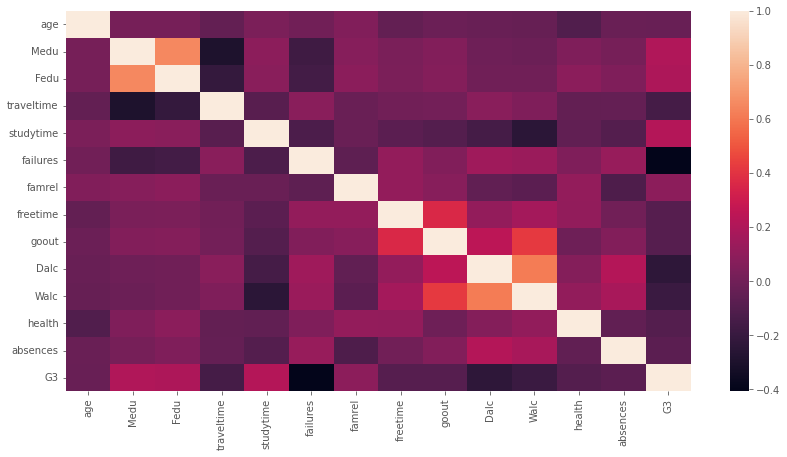

In [44]:
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HIGHT))

sns.heatmap(corr_pearson, ax=ax)

plt.show()

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

In [45]:
corr_spearman = X_train.corr(method='spearman')
corr_spearman

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,-0.104496,-0.104103,0.045757,0.014443,0.313380,0.004334,0.024655,0.173288,0.106105,0.109842,-0.060254,0.153987,-0.120943
Medu,-0.104496,1.000000,0.649158,-0.292184,0.090921,-0.208397,0.065322,0.016949,0.053074,-0.004821,-0.024095,0.055713,0.024186,0.254410
Fedu,-0.104103,0.649158,1.000000,-0.218918,0.090104,-0.170617,0.069760,0.019026,0.059686,-0.001089,-0.011015,0.088271,0.059623,0.222376
traveltime,0.045757,-0.292184,-0.218918,1.000000,-0.117844,0.108612,-0.052389,0.007695,-0.002830,0.049697,0.028116,-0.074656,-0.002857,-0.163508
studytime,0.014443,0.090921,0.090104,-0.117844,1.000000,-0.126567,0.004516,-0.086508,-0.109090,-0.180305,-0.249431,-0.080128,-0.114375,0.259593
failures,0.313380,-0.208397,-0.170617,0.108612,-0.126567,1.000000,-0.060283,0.108229,0.037942,0.131170,0.101222,0.043899,0.113347,-0.464614
famrel,0.004334,0.065322,0.069760,-0.052389,0.004516,-0.060283,1.000000,0.117550,0.069828,-0.072194,-0.097088,0.102186,-0.133726,0.092898
freetime,0.024655,0.016949,0.019026,0.007695,-0.086508,0.108229,0.117550,1.000000,0.368421,0.147248,0.170079,0.126156,-0.020988,-0.085545
goout,0.173288,0.053074,0.059686,-0.002830,-0.109090,0.037942,0.069828,0.368421,1.000000,0.254390,0.405293,-0.001483,0.091942,-0.115120
Dalc,0.106105,-0.004821,-0.001089,0.049697,-0.180305,0.131170,-0.072194,0.147248,0.254390,1.000000,0.618808,0.085435,0.140013,-0.259769


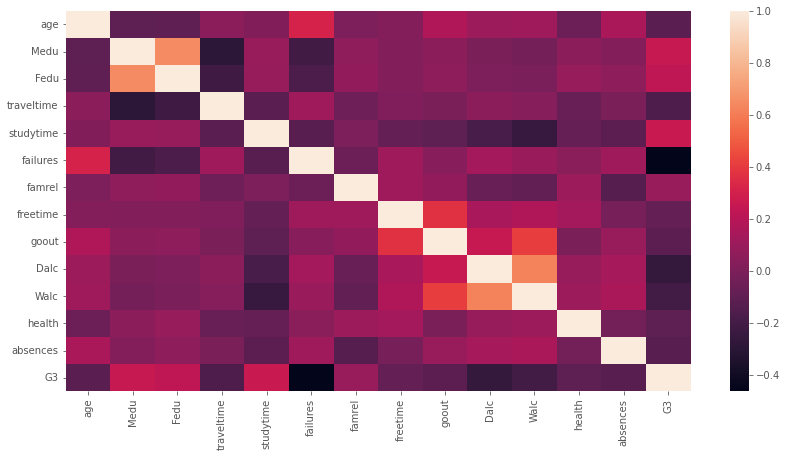

In [46]:
fig, ax = plt.subplots(figsize=(FIG_WIDTH, FIG_HIGHT))

sns.heatmap(corr_spearman, ax=ax)

plt.show()

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

In [47]:
columns = X_train.columns

data_expected = [2, 2, 8, 2, 2, 2, 5, 5, 5, 5,
                 4, 3, 4, 4, 3, 2, 2, 2, 2, 2,
                 2, 2, 2, 5, 5, 5, 5, 5, 5, 94,
                 21]
data_unique = []

for column in columns:
    data_unique.append(X_train[column].unique().size)

pd.DataFrame(data={'unique': data_unique, 'expected': data_expected},
             index = X_train.columns)

,unique,expected
school,2,2
sex,6,2
age,17,8
address,3,2
famsize,2,2
Pstatus,2,2
Medu,5,5
Fedu,5,5
Mjob,5,5
Fjob,5,5


## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

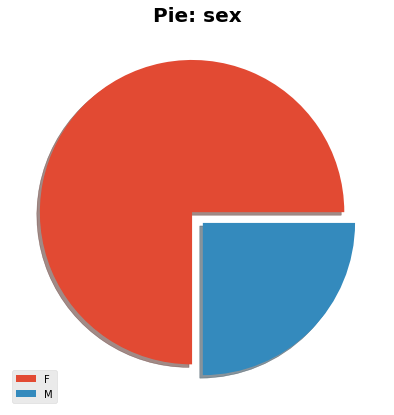

In [48]:
df = X_train[(X_train['G3'] >= 16) & (X_train['traveltime'] >= 3)]
visualize_table(df, ['sex'], create_pie)

## Построить boxplot для оценок по возрасту.  

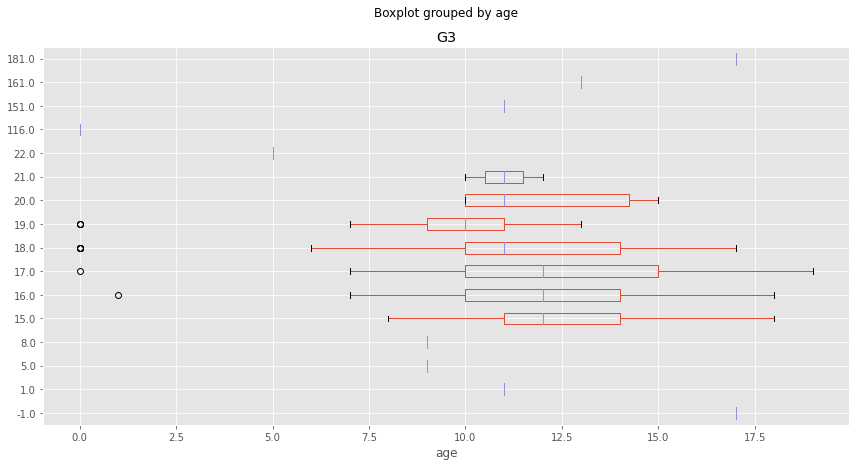

In [49]:
X_train.boxplot(column='G3', by='age', vert=False, figsize=(FIG_WIDTH, FIG_HIGHT))

plt.show()

## Найти id топ-5 самых юных отличников. 

In [50]:
df = X_train
ids = df.sort_values(by=['G3', 'age'], ascending=[False, True]).head(5).index

print(list(ids))

[74, 109, 151, 221, 294]


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [51]:
df_max = X_train[['age', 'G3']].groupby(by='age').max()
df_min = X_train[['age', 'G3']].groupby(by='age').min()

df = df_max.merge(df_min, left_on=df_max.index, right_on=df_min.index)
df.columns = ['age', 'G3 max', 'G3 min']

df

,age,G3 max,G3 min
0,-1.0,17,17
1,1.0,11,11
2,5.0,9,9
3,8.0,9,9
4,15.0,18,8
5,16.0,18,1
6,17.0,19,0
7,18.0,17,0
8,19.0,13,0
9,20.0,15,10


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

**Age:**

In [52]:
X_train.loc[(X_train['age'] < 15) | (X_train['age'] > 22), 'age'] = np.NaN

**Sex:**

In [53]:
X_train.loc[(X_train['sex'] != 'M') & (X_train['sex'] != 'F'), 'sex'] = np.NaN

## Удалите скоррелированные данные

In [55]:
# NO!

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

**Age:**

In [62]:
mean = np.round(X_train['age'].mean(), 1)
X_train.loc[:, 'age'].fillna(value=mean, inplace=True)

**Sex:**

In [67]:
X_train.loc[:, 'sex'].fillna(method='ffill', inplace=True)

**Address:**

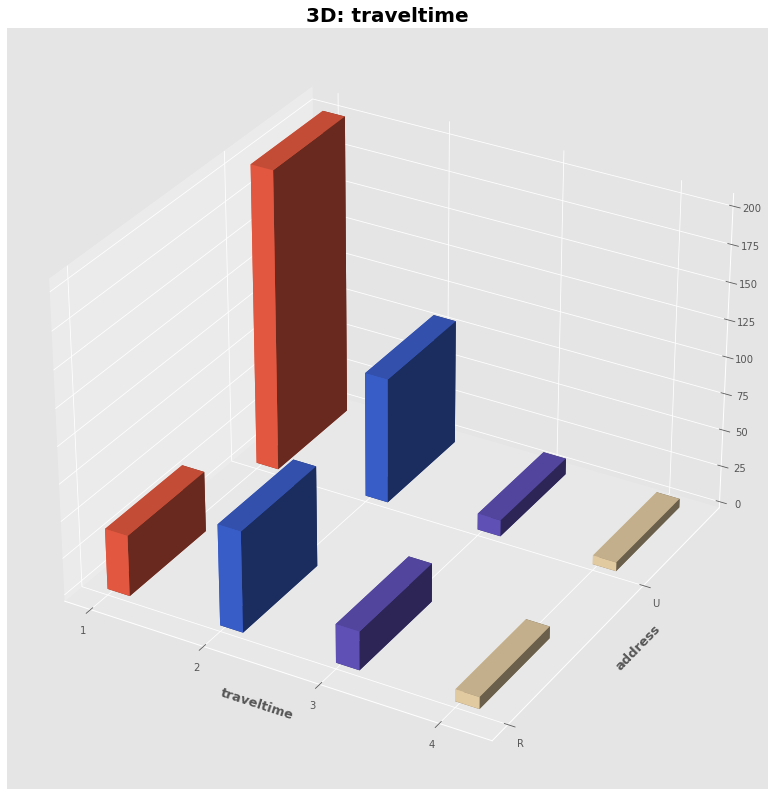

In [56]:
visualize_hists_3D(X_train, 'address', 'traveltime')

In [57]:
X_train.loc[(X_train['address'].isna()) & 
            (X_train['traveltime'] == 1), 'address'] = 'U'

X_train.loc[(X_train['address'].isna()) & 
            (X_train['traveltime'] == 4), 'address'] = 'R'

## Закодируйте категориальные признаки

In [73]:
df = pd.get_dummies(X_train, columns=COLUMNS_NOTNUM)

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.